# Regularization and Cross-Validation
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement **Ridge Regression** to control overfitting
- implement **Logistic Regression with regularization** to control overfitting 
- implement **Cross-Validation** to control overfitting

In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
digit_train = sio.loadmat('digit_train')
X = digit_train['X']
y = digit_train['y']
digit_test = sio.loadmat('digit_test')
X_test = digit_test['X_test']
y_test = digit_test['y_test']

In [3]:
def show_digit(fea):
    plt.rcParams['figure.figsize'] = (10.0, 8.0)
    idx = np.random.permutation(X.shape[1])
    fea = fea[:, idx[:100]]
    faceW = 28
    faceH = 28
    numPerLine = 20
    ShowLine = 4
    Y = np.zeros((faceH * ShowLine, faceW * numPerLine), dtype=np.float)
    for i in range(ShowLine):
        for j in range(numPerLine):
            Y[i * faceH:(i + 1) * faceH, j * faceW:(j + 1) * faceW] = fea[:,i * numPerLine + j].reshape((faceH, faceW))            
    plt.imshow(Y, cmap='gray')

### Ridge Regression and LOOCV

cur lambdas is 0.001, E_val is 57, sum of w is 0.8865246882981507

cur lambdas is 0.01, E_val is 57, sum of w is 0.885054448509151

cur lambdas is 0.1, E_val is 57, sum of w is 0.8707062922676476

cur lambdas is 0.0, E_val is 57, sum of w is 0.8890514555989499

cur lambdas is 1.0, E_val is 59, sum of w is 0.7550343725265884

cur lambdas is 10.0, E_val is 60, sum of w is 0.3821604686869421

cur lambdas is 100.0, E_val is 70, sum of w is 0.11365896091434162

cur lambdas is 1000.0, E_val is 87, sum of w is 0.029827122902049714

chosen lambdas is 0.1, E_val_min is 57， W_sum_min is 0.8707062922676476.



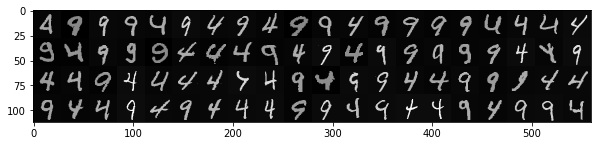

In [8]:
show_digit(X)
# Do feature normalization here
# begin answer
from scipy import stats
X = stats.mstats.zscore(X)
X_test = stats.mstats.zscore(X_test)

# print(X_test)
# end answer
# print(X)
# Do LOOCV
lmbdas = np.array([1e-3, 1e-2, 1e-1, 0, 1, 1e1, 1e2, 1e3])
lmbda = 0
E_val_min = float('inf')
W_sum_min = float('inf')
from ridge import ridge

for i in range(len(lmbdas)):
    E_val = 0
    for j in range(X.shape[1]):
        X_pre = X[:, 0:j]
        X_last = X[:, j+1:X.shape[1]]
        X_ = np.concatenate((X_pre, X_last), axis = 1)
        y_pre = y[:, 0:j]
        y_last = y[:, j+1:y.shape[1]]
        y_ = np.concatenate((y_pre, y_last), axis = 1)
        w =  ridge(X_, y_, lmbdas[i])
        X_j = X[:, j]
        y_j  = y[:, j]
        X_j_N = X_j.shape[0]
        X_j_new = np.hstack((1, X_j))
        prediction  = np.int(np.matmul(w.T, X_j_new))
        if prediction < 0:
            prediction = -1
        else:
            prediction = 1
        single_error = 0
        if prediction != y_j[0]:
            single_error = 1
        E_val = E_val + single_error
#         print("j:{}".format(j))
    # Update lmbda according validation error
    # begin answer
    if E_val_min >= E_val and W_sum_min > np.sum(np.multiply(w, w)):
        lmbda = lmbdas[i]
        E_val_min = E_val
        W_sum_min = np.sum(np.multiply(w, w))
    print('cur lambdas is {}, E_val is {}, sum of w is {}\n'.format(lmbdas[i], E_val, np.sum(np.multiply(w, w))))
print('chosen lambdas is {}, E_val_min is {}， W_sum_min is {}.\n'.format(lmbda, E_val_min, W_sum_min))
    # end answer

cur lambdas is 0.001, training error is 0.0, testing error is 0.09040683073832245

cur lambdas is 0.01, training error is 0.0, testing error is 0.09040683073832245

cur lambdas is 0.1, training error is 0.0, testing error is 0.09040683073832245

cur lambdas is 0.0, training error is 0.0, testing error is 0.09040683073832245

cur lambdas is 1.0, training error is 0.0, testing error is 0.08689100954294325

cur lambdas is 10.0, training error is 0.0, testing error is 0.08287292817679558

cur lambdas is 100.0, training error is 0.0, testing error is 0.06479156202913108

cur lambdas is 1000.0, training error is 0.01, testing error is 0.05926670015067805



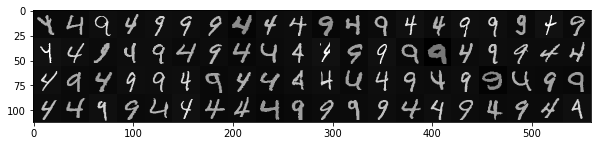

In [6]:
show_digit(X)
# Do feature normalization here
# begin answer
from scipy import stats
X = stats.mstats.zscore(X)
X_test = stats.mstats.zscore(X_test)

# print(X_test)
# end answer
# print(X)
# Do LOOCV
lmbdas = np.array([1e-3, 1e-2, 1e-1, 0, 1, 1e1, 1e2, 1e3])
lmbda = 0
E_val_min = float('inf')

from ridge import ridge

# for i in range(len(lmbdas)):
#     E_val = 0
#     for j in range(X.shape[1]):
#         X_pre = X[:, 0:j]
#         X_last = X[:, j+1:X.shape[1]]
#         X_ = np.concatenate((X_pre, X_last), axis = 1)
#         y_pre = y[:, 0:j]
#         y_last = y[:, j+1:y.shape[1]]
#         y_ = np.concatenate((y_pre, y_last), axis = 1)
#         w =  ridge(X_, y_, lmbdas[i])
#         X_j = X[:, j]
#         y_j  = y[:, j]
# #         print(X_j.shape, y_j.shape, w.shape)
#         X_j_N = X_j.shape[0]
#         X_j_new = np.hstack((1, X_j))
#         prediction  = np.int(np.matmul(w.T, X_j_new))
#         if prediction < 0:
#             prediction = -1
#         else:
#             prediction = 1
#         single_error = 0
# #         print(type(y_j[0]))
# #         print(y_j[0])
# #         print(1 != y_j[0])
#         if prediction != y_j[0]:
#             single_error = 1
#         E_val = E_val + single_error
# #         print("j:{}".format(j))
#     # Update lmbda according validation error
#     # begin answer
#     if E_val_min > E_val:
#         lmbda = lmbdas[i]
#         E_val_min = E_val
#     print('cur lambdas is {}, E_val is {}, sum of w is {}\n'.format(lmbdas[i], E_val, np.sum(np.multiply(w, w))))
    # end answer
    
# Compute training error
for i in range(len(lmbdas)):
    w =  ridge(X, y, lmbdas[i])
    y_prediction = np.matmul(w.T, np.vstack((np.ones((1, X.shape[1])), X)))
    y_prediction = np.where(y_prediction > 0, 1., -1.)
    error_idx = np.argwhere(np.multiply(y_prediction, y) < 0)
    error_count = (error_idx.shape[0])
    train_error_rate = error_count / X.shape[1]
    
    y_test_prediction = np.matmul(w.T, np.vstack((np.ones((1, X_test.shape[1])), X_test)))
    y_test_prediction = np.where(y_test_prediction > 0, 1., -1.)
    error_idx = np.argwhere(np.multiply(y_test_prediction, y_test) < 0)
    error_count = (error_idx.shape[0])
    test_error_rate = error_count / X_test.shape[1]
    print('cur lambdas is {}, training error is {}, testing error is {}\n'.format(lmbdas[i], train_error_rate, test_error_rate))

# Compute test error


### Logistic Regression with Regularization
Use the simlimar skeleton code above to implement it.

In [13]:
from logistic_r import logistic_r
from scipy import stats
X = stats.mstats.zscore(X)
X_test = stats.mstats.zscore(X_test)

lmbdas = np.array([1e-3, 1e-2, 1e-1, 0, 1, 1e1, 1e2, 1e3])
lmbda = 0
E_val_min = float('inf')
W_sum_min = float('inf')
for i in range(len(lmbdas)):
    E_val = 0
    for j in range(X.shape[1]):
        X_pre = X[:, 0:j]
        X_last = X[:, j+1:X.shape[1]]
        X_ = np.concatenate((X_pre, X_last), axis = 1)
        y_pre = y[:, 0:j]
        y_last = y[:, j+1:y.shape[1]]
        y_ = np.concatenate((y_pre, y_last), axis = 1)
        w = logistic_r(X_, y_, lmbdas[i])
#         print(w)
        X_j = X[:, j]
        y_j  = y[:, j]
        X_j_N = X_j.shape[0]
        X_j_new = np.hstack((1, X_j))
        prediction  = np.int(np.matmul(w.T, X_j_new))
        if prediction < 0:
            prediction = -1
        else:
            prediction = 1
        single_error = 0
        if prediction != y_j[0]:
            single_error = 1
        E_val = E_val + single_error
        
    # Update lmbda according validation error
    # begin answer
    if E_val_min >= E_val and W_sum_min > np.sum(np.multiply(w, w)):
        lmbda = lmbdas[i]
        E_val_min = E_val
        W_sum_min = np.sum(np.multiply(w, w)
    print('current lambdas is {}, E_val is {}, sum of w is {}\n'.format(lmbdas[i], E_val, np.sum(np.multiply(np.sum(np.multiply(w, w)))))
    # end answer
print('chosen lambdas is {}, E_val_min is {}， W_sum_min is {}.\n'.format(lmbda, E_val_min, W_sum_min))


# Compute training error


# Compute test error

current lambdas is 0.001, E_val is 17, sum of w is 0.6835628382780723

current lambdas is 0.01, E_val is 17, sum of w is 0.6834553744534576

current lambdas is 0.1, E_val is 17, sum of w is 0.6823821173330579

current lambdas is 0.0, E_val is 17, sum of w is 0.6835747802547103

current lambdas is 1.0, E_val is 17, sum of w is 0.6717862497481848

current lambdas is 10.0, E_val is 17, sum of w is 0.5781985399881515

current lambdas is 100.0, E_val is 30, sum of w is 0.20840569486312335

current lambdas is 1000.0, E_val is 82, sum of w is 0.017923315526671847



In [7]:
from logistic_r import logistic_r
from scipy import stats
X = stats.mstats.zscore(X)
X_test = stats.mstats.zscore(X_test)

lmbdas = np.array([1e-3, 1e-2, 1e-1, 0, 1, 1e1, 1e2, 1e3])
lmbda = 0
for i in range(len(lmbdas)):
    w =  logistic_r(X, y, lmbdas[i])
    y_prediction = np.matmul(w.T, np.vstack((np.ones((1, X.shape[1])), X)))
    y_prediction = np.where(y_prediction > 0, 1., -1.)
    error_idx = np.argwhere(np.multiply(y_prediction, y) < 0)
    error_count = (error_idx.shape[0])
    train_error_rate = error_count / X.shape[1]
    
    y_test_prediction = np.matmul(w.T, np.vstack((np.ones((1, X_test.shape[1])), X_test)))
    y_test_prediction = np.where(y_test_prediction > 0, 1., -1.)
    error_idx = np.argwhere(np.multiply(y_test_prediction, y_test) < 0)
    error_count = (error_idx.shape[0])
    test_error_rate = error_count / X_test.shape[1]
    print('With normalization, lambdas is {}, training error is {}, testing error is {}\n'.format(lmbdas[i], train_error_rate, test_error_rate))

With normalization, lambdas is 0.001, training error is 0.0, testing error is 0.052737317930688095

With normalization, lambdas is 0.01, training error is 0.0, testing error is 0.052737317930688095

With normalization, lambdas is 0.1, training error is 0.0, testing error is 0.052737317930688095

With normalization, lambdas is 0.0, training error is 0.0, testing error is 0.052737317930688095

With normalization, lambdas is 1.0, training error is 0.0, testing error is 0.053239578101456554

With normalization, lambdas is 10.0, training error is 0.0, testing error is 0.051230537418382724

With normalization, lambdas is 100.0, training error is 0.015, testing error is 0.06027122049221497

With normalization, lambdas is 1000.0, training error is 0.075, testing error is 0.10296333500753391

